In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
#plt.style.use('ggplot')
plt.style.use('seaborn')
#plt.style.use('fivethirtyeight')

# **Casos diarios**: Data product 5.

In [2]:
path5 = 'D:\Proyectos\Datos-COVID19\output\producto5\TotalesNacionales.csv'
#df = pd.read_csv('TotalesNacionales.csv').transpose()
df = pd.read_csv(path5).transpose()
df = df.rename(columns={i: df.loc['Fecha', i] for i in range(19)})
df = df.drop(index=['Fecha'])
df.index = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in df.index]
df.tail(10)

,Casos nuevos con sintomas,Casos totales,Casos recuperados,Fallecidos,Casos activos,Casos nuevos sin sintomas,Casos nuevos totales,Casos activos por FD,Casos activos por FIS,Casos recuperados por FIS,Casos recuperados por FD,Casos confirmados recuperados,Casos activos confirmados,Casos probables acumulados,Casos activos probables,Casos nuevos sin notificar,Casos confirmados por antigeno,Casos con sospecha de reinfeccion,Casos nuevos confirmados por antigeno
2021-07-01,2033,1.55856e+06,NaN,32588,22224,493,2677,60326,22224,1.50374e+06,1.46564e+06,1.50241e+06,22224,309735,7656,151,56441,1516,540
2021-07-02,2825,1.56261e+06,NaN,32809,22739,1017,4086,57612,22739,1.50706e+06,1.47219e+06,1.50571e+06,22739,311036,7810,244,56819,1520,405
2021-07-03,2659,1.56646e+06,NaN,32973,22809,1030,3880,55186,22809,1.51068e+06,1.4783e+06,1.5093e+06,22809,312097,7669,191,57227,1532,443
2021-07-04,2253,1.56978e+06,NaN,33103,21709,907,3368,52766,21709,1.51497e+06,1.48392e+06,1.5135e+06,21709,313057,7415,208,57578,1540,396
2021-07-05,1803,1.57261e+06,NaN,33249,20647,811,2852,50385,20647,1.51871e+06,1.48897e+06,1.5173e+06,20647,313196,6519,238,57795,1546,248
2021-07-06,1309,1.57446e+06,NaN,33288,18883,455,1885,48802,18883,1.52229e+06,1.49238e+06,1.52088e+06,18883,313462,5829,121,57992,1553,220
2021-07-07,1437,1.57634e+06,NaN,33328,17357,359,1892,47927,17357,1.52565e+06,1.49508e+06,1.52423e+06,17357,314963,6396,96,58377,1555,404
2021-07-08,2160,1.57959e+06,NaN,33514,17590,853,3193,47719,17590,1.52849e+06,1.49836e+06,1.52705e+06,17590,315893,6351,180,58735,1557,366
2021-07-09,1882,1.58239e+06,NaN,33636,18027,832,2906,44920,18027,1.53073e+06,1.50384e+06,1.52927e+06,18027,316732,6355,192,58981,1569,279
2021-07-10,1748,1.58516e+06,NaN,33767,17843,811,2696,42518,17843,1.53355e+06,1.50888e+06,1.53208e+06,17843,317378,6035,137,59226,1569,265


In [3]:
# Se agrega casos diarios
df['Casos diarios'] = df['Casos totales'].diff(periods=1)

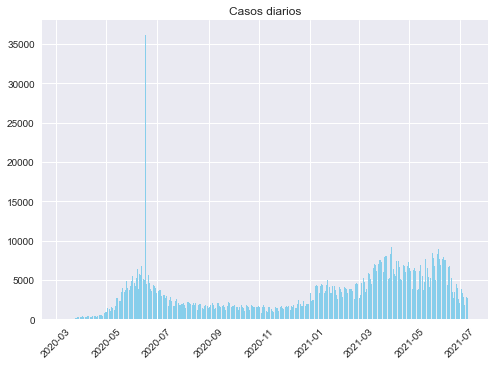

In [4]:
plt.bar(df.index[7:], df['Casos diarios'][7:], color='skyblue')
plt.xticks(rotation=45)
plt.title('Casos diarios')
plt.show()

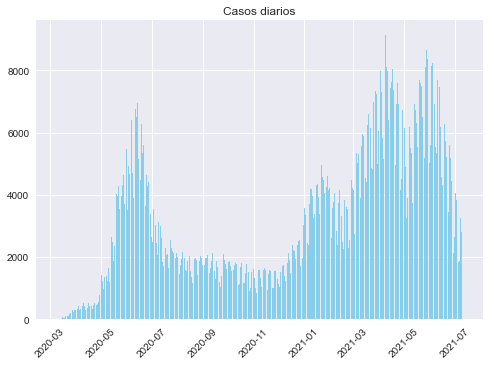

In [5]:
# El '2020-06-17' hay un número muy grande de casos. Parece que ese día agregaron datos que las 
# autoridades no estaban informando. Se decide por eliminar ese día para que la curva quede parecida
# a la curva "oficial".
df = df.drop(index=[datetime.datetime(2020, 6, 17)])

plt.bar(df.index[7:], df['Casos diarios'][7:], color='skyblue')
plt.xticks(rotation=45)
plt.title('Casos diarios')
plt.show()

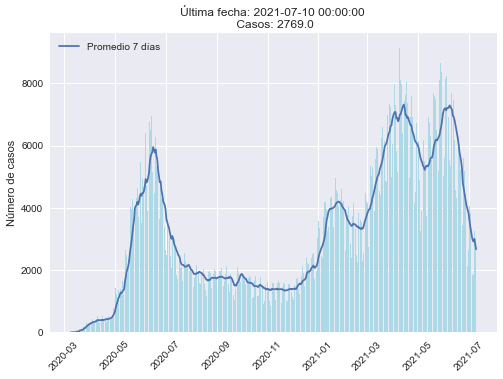

In [6]:
# Se agrega columna promedio 7 días para casos diarios.
n = 7
df['Casos diarios promedio {} días'.format(n)] = df['Casos diarios'].rolling(window=n).mean()

plt.bar(df.index[7:], df['Casos diarios'][7:], color='lightblue')
plt.plot(df.index[7:], df['Casos diarios promedio 7 días'][7:].values, label='Promedio 7 días')
plt.xticks(rotation=45)
plt.title('Última fecha: {} \n Casos: {}'. format(df.index[-1], df['Casos diarios'][-1]))
plt.ylabel('Número de casos')
plt.legend()
plt.show()

# **Pacientes COVID-19 en UCI por grupo de edad**: Data product 9

In [7]:
path9 = 'D:\Proyectos\Datos-COVID19\output\producto9\HospitalizadosUCIEtario_T.csv'
edad = pd.read_csv(path9)
edad.index = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in edad['Grupo de edad']]
edad.drop(columns=['Grupo de edad'], inplace=True)
edad.tail(10)

,<=39,40-49,50-59,60-69,>=70
2021-07-01,568,490,630,719,513
2021-07-02,561,471,623,712,497
2021-07-03,542,449,621,720,499
2021-07-04,532,444,602,701,495
2021-07-05,510,441,588,701,493
2021-07-06,504,432,579,698,488
2021-07-07,487,417,571,698,503
2021-07-08,455,398,558,680,470
2021-07-09,428,385,546,669,468
2021-07-10,417,370,538,644,460


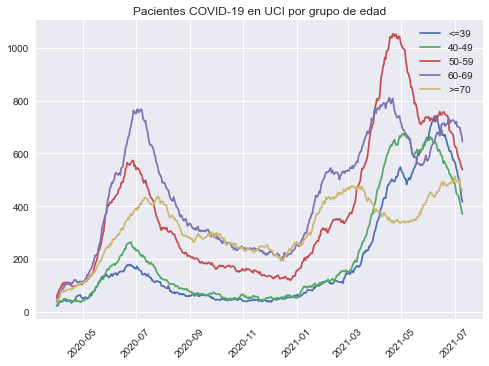

In [8]:
for grupo in edad.columns:
    plt.plot(edad.index, edad[grupo], label=grupo)

plt.title('Pacientes COVID-19 en UCI por grupo de edad')
plt.legend()
plt.xticks(rotation=45)
plt.show()

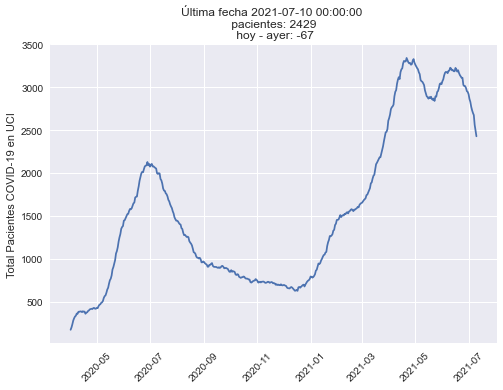

In [17]:
# El agregado (suma sobre los intervalos de edades)
agg = edad.sum(axis=1)
plt.plot(agg.index, agg)
plt.xticks(rotation=45)
plt.ylabel("Total Pacientes COVID-19 en UCI")
plt.title("Última fecha {} \n pacientes: {} \n hoy - ayer: {}".format(agg.index[-1], agg[-1], agg[-1] - agg[len(agg) - 2]))
plt.show()

# **DP10 - Fallecidos con COVID-19 por grupo de edad: Descripción**: Data product 10

In [10]:
path10 = 'D:\Proyectos\Datos-COVID19\output\producto10\FallecidosEtario_T.csv'
fallecidos_etario = pd.read_csv(path10)
fallecidos_etario.tail(10)

,Grupo de edad,<=39,40-49,50-59,60-69,70-79,80-89,>=90
448,2021-07-01,877,1375,3597,6715,8879,8075,3070
449,2021-07-02,888,1382,3622,6761,8937,8122,3097
450,2021-07-03,896,1386,3643,6786,8978,8170,3114
451,2021-07-04,900,1396,3662,6808,9017,8198,3122
452,2021-07-05,902,1407,3677,6837,9052,8237,3137
453,2021-07-06,906,1407,3683,6851,9058,8243,3140
454,2021-07-07,906,1409,3685,6856,9074,8254,3144
455,2021-07-08,914,1423,3709,6891,9121,8288,3168
456,2021-07-09,920,1425,3722,6911,9154,8322,3182
457,2021-07-10,927,1430,3736,6938,9196,8349,3191


In [11]:
# Poner fechas como index.
fallecidos_etario.index = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in fallecidos_etario['Grupo de edad']]
fallecidos_etario.drop(columns=['Grupo de edad'], inplace=True)

# "Derivar" para encontrar los casos diarios desde los acumulados.
fallecidos_etario = fallecidos_etario.diff(periods=1)

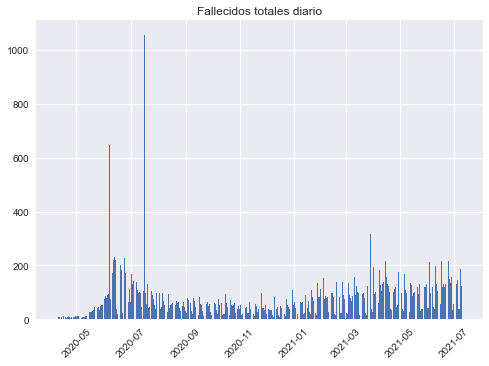

In [12]:
# Número total de fallecidos por día.
plt.bar(fallecidos_etario.sum(axis=1).index, fallecidos_etario.sum(axis=1).values)
plt.title('Fallecidos totales diario')
plt.xticks(rotation=45)
plt.show()

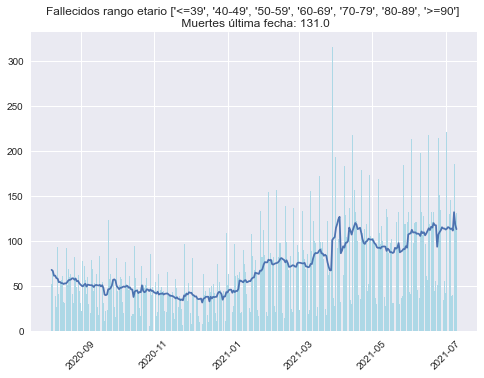

In [13]:
rangos =  ['<=39', '40-49', '50-59', '60-69', '70-79', '80-89', '>=90']
start_date = datetime.datetime(2020, 8, 1)
#rangos = ['70-79', '80-89']

since_start_date = fallecidos_etario[rangos][fallecidos_etario.index >= start_date]
plt.bar(since_start_date.index[7:], since_start_date.sum(axis=1)[7:], color='lightblue')
plt.plot(since_start_date.index[7:], since_start_date.sum(axis=1).rolling(window=7).mean()[7:])
plt.xticks(rotation=45)
plt.title('Fallecidos rango etario {} \n Muertes última fecha: {}'.format(rangos, since_start_date.sum(axis=1)[-1]))
plt.show()